In [57]:
import csv
import matplotlib.pyplot as plt
import numpy as np


In [58]:
# lecture fichier Eucalypcus
file = open("Downloads/Eucalyptus.csv")
csvreader = csv.reader(file)

xi = 0.0
yi = 0.0
xi2 = 0.0
xiyi= 0.0
circs = np.empty([0])
hauteurs = np.empty([0])

for row in csvreader:
    c = float(row[0])
    h = float(row[1])
    xi += c
    yi += h
    xiyi += c*h
    xi2 += c**2
    circs = np.append(circs,c)
    hauteurs = np.append(hauteurs,h)

file.close()


beta1: 9.037475668452768, beta2: 0.257137855007109


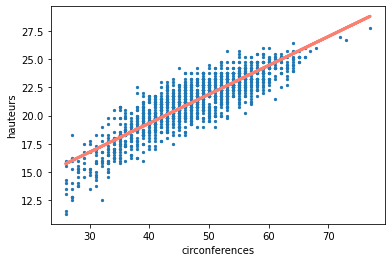

Moyenne de espilon: 5.071753607244942e-16


In [59]:
# Question 3
n = circs.size
beta1 = (xi2*yi - xi*xiyi)/(n*xi2-xi**2)
beta2 = (n*xiyi - xi*yi)/(n*xi2-xi**2)
print(f"beta1: {beta1}, beta2: {beta2}")

y = beta1+beta2*circs

plt.scatter(circs, hauteurs,s=5)
plt.plot(circs, y, color='salmon', linewidth=3)
plt.xlabel("circonferences");
plt.ylabel("hauteurs")
plt.show()

print(f"Moyenne de espilon: {np.sum(y-hauteurs)/n}")

In [60]:
np.append([(1,2,3)], [(7, 8, 9)],axis=0)

array([[1, 2, 3],
       [7, 8, 9]])

In [112]:
#Q7
# lecture fichier Eucalypcus
file = open("Downloads/Eucalyptus.csv")
csvreader = csv.reader(file)

circs = np.empty([0,3], float)
circs2 = np.empty([0,2], float)
circs3 = np.empty([0,4], float)
hauteurs = np.empty([0])


for row in csvreader:
    c = float(row[0])
    h = float(row[1])
    circs = np.append(circs,[(1.0,c,np.sqrt(c))],axis=0)
#    circs = np.append(circs,[(1.0,c,c**2)],axis=0)
    circs2 = np.append(circs2,[(1.0,c)],axis=0)
    circs3 = np.append(circs3,[(1.0,c,c**2,c**3)],axis=0)
    hauteurs = np.append(hauteurs,h)

file.close()


In [113]:
circsT = circs.transpose()
A = np.matmul(circsT,circs)
A_inv = np.linalg.inv(A)
B = np.matmul(circsT,hauteurs)
beta = np.matmul(A_inv,B)
print(f"Beta: {beta}")

Beta: [-24.35200327  -0.48294547   9.98688814]


In [114]:
circs2T = circs2.transpose()
A2 = np.matmul(circs2T,circs2)
A2_inv = np.linalg.inv(A2)
B2 = np.matmul(circs2T,hauteurs)
beta2 = np.matmul(A2_inv,B2)
print(f"Beta2: {beta2}")

Beta2: [9.03747567 0.25713786]


In [115]:
circs3T = circs3.transpose()
A3 = np.matmul(circs3T,circs3)
A3_inv = np.linalg.inv(A3)
B3 = np.matmul(circs3T,hauteurs)
beta3 = np.matmul(A3_inv,B3)
print(f"Beta3: {beta3}")

Beta3: [-1.19151419e+01  1.48696538e+00 -2.28529783e-02  1.34181666e-04]


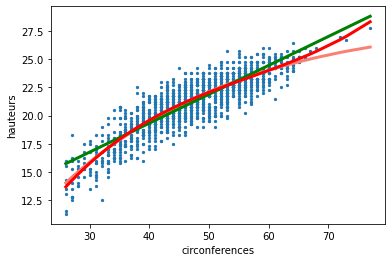

Moyenne de espilon: -5.149602407693506e-08
Moyenne de espilon: 1.5637262544625338e-10
Moyenne de espilon: -2.6933244021627023e-08


In [116]:
# tri par hauteurs 
circs_sort = circs[circs[:, 1].argsort()]
y = beta[0]+beta[1]*circs_sort[:,[1]]+beta[2]*circs_sort[:,[2]]
circs2_sort = circs2[circs[:, 1].argsort()]
y2 = beta2[0]+beta2[1]*circs2_sort[:,[1]]
circs3_sort = circs3[circs[:, 1].argsort()]
y3 = beta3[0]+beta3[1]*circs3_sort[:,[1]]+beta3[2]*circs3_sort[:,[2]]+beta3[3]*circs3_sort[:,[3]]

plt.scatter(circs[:,[1]], hauteurs,s=5)
plt.plot(circs_sort[:,[1]], y, color='salmon', linewidth=3)
plt.plot(circs_sort[:,[1]], y2, color='green', linewidth=3)
plt.plot(circs_sort[:,[1]], y3, color='red', linewidth=3)
plt.xlabel("circonferences");
plt.ylabel("hauteurs")
plt.show()

y_pas_trie = beta[0]+beta[1]*circs[:,[1]]+beta[2]*circs[:,[2]]
print(f"Moyenne de espilon: {np.sum(y_pas_trie-hauteurs)/n}")
y2_pas_trie = beta2[0]+beta2[1]*circs2[:,[1]]
print(f"Moyenne de espilon: {np.sum(y2_pas_trie-hauteurs)/n}")
y3_pas_trie = beta3[0]+beta3[1]*circs3[:,[1]]+beta3[2]*circs3[:,[2]]+beta3[3]*circs3[:,[3]]
print(f"Moyenne de espilon: {np.sum(y3_pas_trie-hauteurs)/n}")